### Complete table

In [34]:
import pandas as pd
import numpy as np

# Load the dataset (replace this with your file path or load directly)
df = pd.read_csv("measurement_data_with_Xn.csv")  # <-- Replace with your actual file name

# Standard uncertainty for both measurements
delta_combined = np.sqrt(0.01**2 + 0.01**2)

# Compute Dif^2 and δDif^2
df["Dif_squared"] = df["Dif"] ** 2
df["delta_Dif_squared"] = 2 * df["Dif"].abs() * delta_combined

# Round for neat output
df["Dif"] = df["Dif"].round(2)
df["Dif_squared"] = df["Dif_squared"].round(2)
df["delta_Dif_squared"] = df["delta_Dif_squared"].round(2)

# Save the full dataset with computed columns
df.to_csv("measurement_data_with_XY.csv", index=False)

# Sort for presentation
df = df.sort_values(by=["mass", "orientation", "n"], ascending=[True, True, False])
grouped = df.groupby(["mass", "orientation"])

# Print formatted output
print("Data with computed squared differences labeled X or Y based on orientation:\n")
for (mass, orientation), group in grouped:
    is_horizontal = orientation == "horizontal"
    label = "X" if is_horizontal else "Y"
    
    print(f"\nTable: {mass} kg - {orientation.upper()}")
    print("-" * 50)
    print(group[["n", "Dif", "Dif_squared", "delta_Dif_squared"]]
          .rename(columns={
              "Dif": f"{label} (mm)",
              "Dif_squared": f"{label}² (mm²)",
              "delta_Dif_squared": f"δ{label}² (mm²)"
          })
          .to_string(index=False))



Data with computed squared differences labeled X or Y based on orientation:


Table: 1 kg - HORIZONTAL
--------------------------------------------------
 n  X (mm)  X² (mm²)  δX² (mm²)
 4   37.41   1399.51       1.06
 3   28.46    809.97       0.80
 2   19.58    383.38       0.55
 1    7.95     63.20       0.22

Table: 1 kg - VERTICAL
--------------------------------------------------
 n  Y (mm)  Y² (mm²)  δY² (mm²)
 2   31.34     982.2       0.89
 1   18.21     331.6       0.52

Table: 3 kg - HORIZONTAL
--------------------------------------------------
 n  X (mm)  X² (mm²)  δX² (mm²)
 6   25.34    642.12       0.72
 5   21.77    473.93       0.62
 4   18.73    350.81       0.53
 3   15.29    233.78       0.43
 2   11.11    123.43       0.31
 1    4.38     19.18       0.12

Table: 3 kg - VERTICAL
--------------------------------------------------
 n  Y (mm)  Y² (mm²)  δY² (mm²)
 4   35.90   1288.81       1.02
 3   31.74   1007.43       0.90
 2   26.91    724.15       0.76
 1   19.50 

## Data analysis

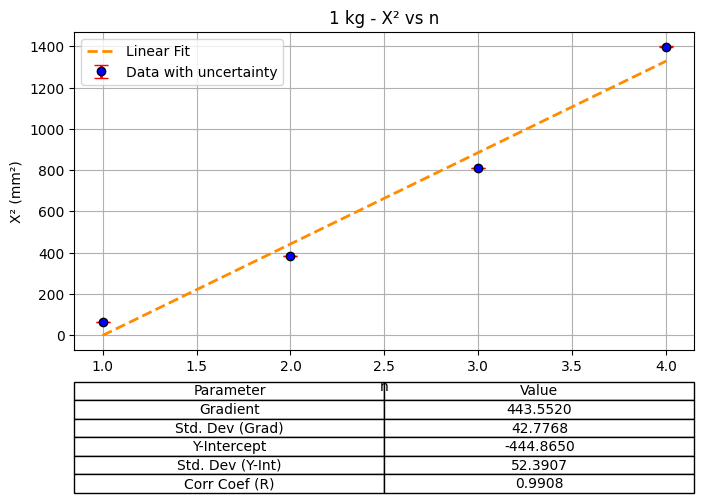

✅ Saved plot with red error bars: plots/1kg_X2_vs_n_with_errorbar.png


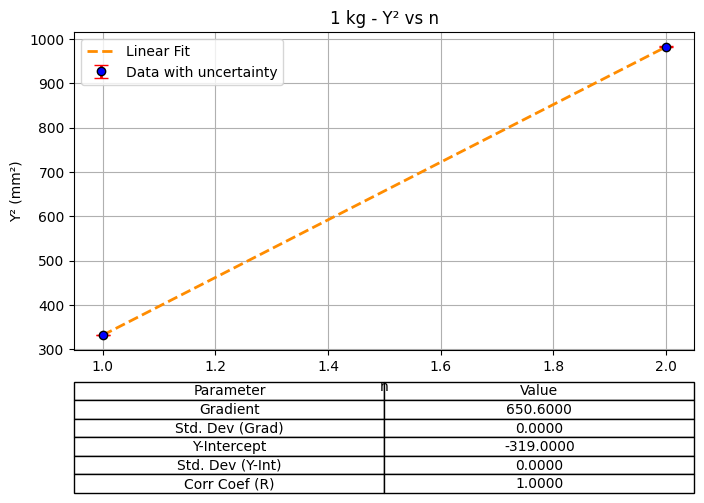

✅ Saved plot with red error bars: plots/1kg_Y2_vs_n_with_errorbar.png


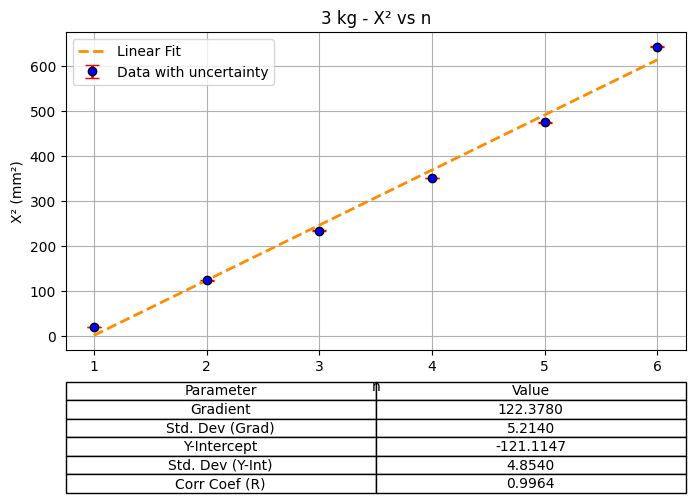

✅ Saved plot with red error bars: plots/3kg_X2_vs_n_with_errorbar.png


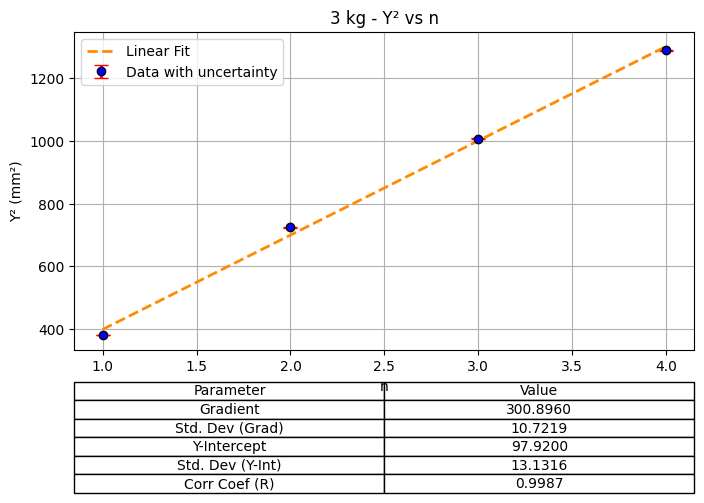

✅ Saved plot with red error bars: plots/3kg_Y2_vs_n_with_errorbar.png


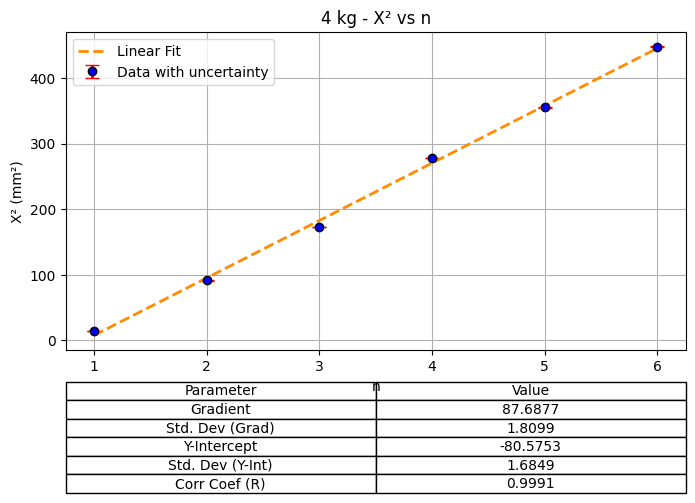

✅ Saved plot with red error bars: plots/4kg_X2_vs_n_with_errorbar.png


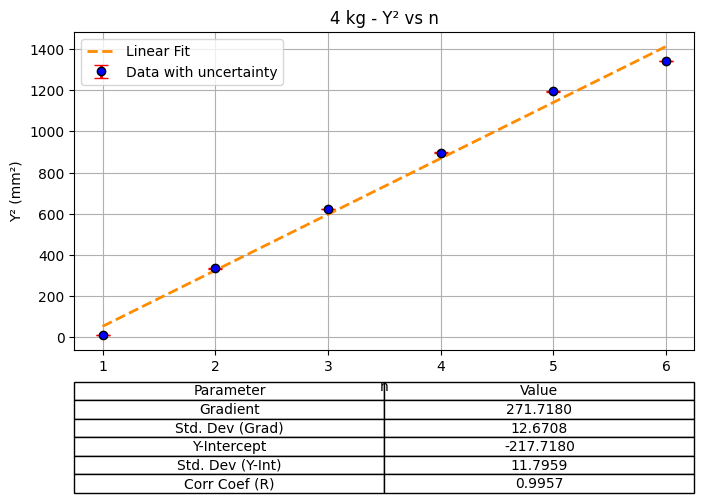

✅ Saved plot with red error bars: plots/4kg_Y2_vs_n_with_errorbar.png


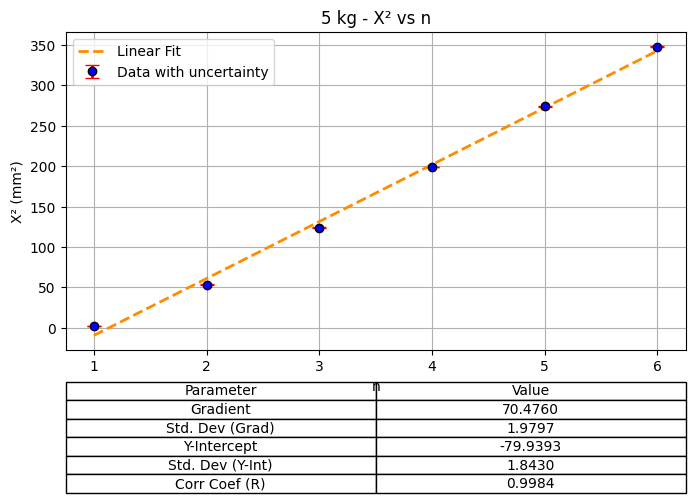

✅ Saved plot with red error bars: plots/5kg_X2_vs_n_with_errorbar.png


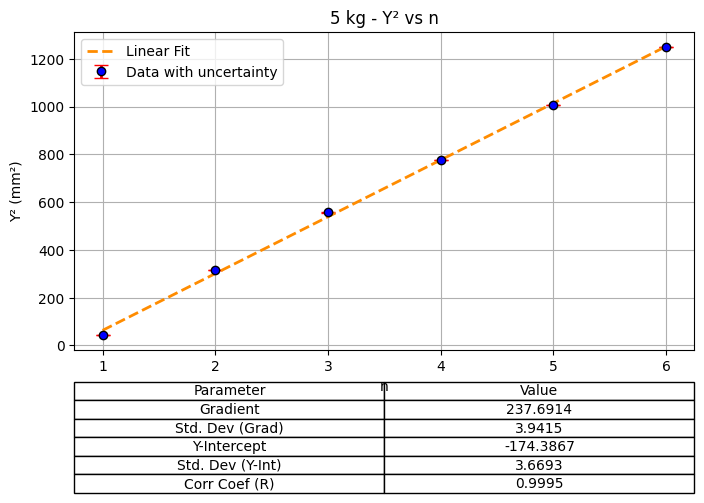

✅ Saved plot with red error bars: plots/5kg_Y2_vs_n_with_errorbar.png


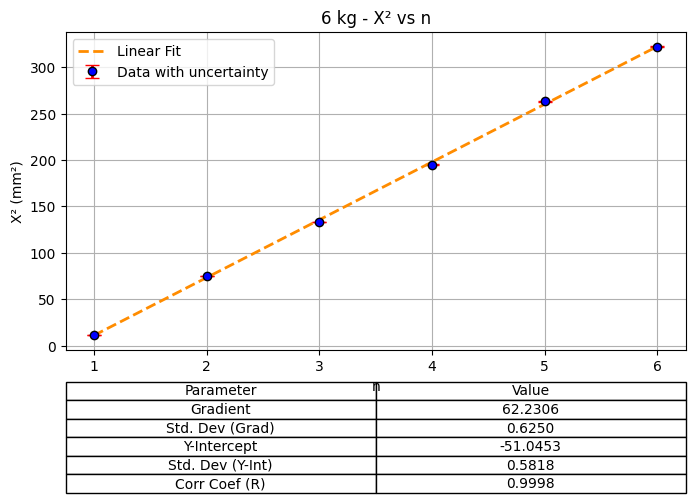

✅ Saved plot with red error bars: plots/6kg_X2_vs_n_with_errorbar.png


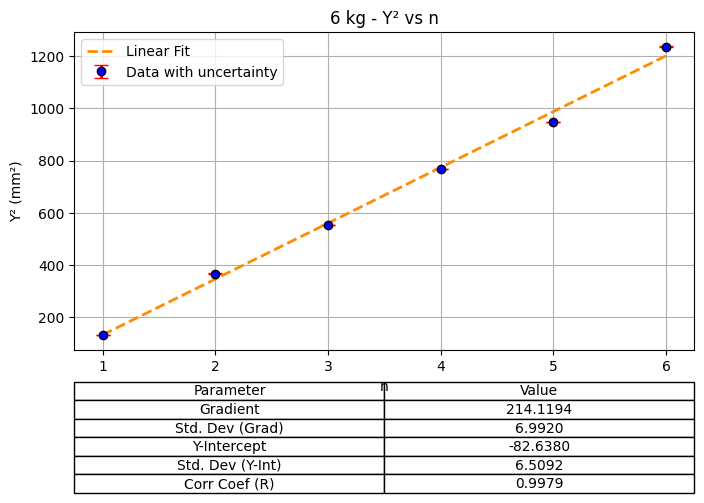

✅ Saved plot with red error bars: plots/6kg_Y2_vs_n_with_errorbar.png


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

# Load the dataset
df = pd.read_csv("measurement_data_with_XY.csv")

# Ensure output folder exists
os.makedirs("plots", exist_ok=True)

# Sort and group
df = df.sort_values(by=["mass", "orientation", "n"], ascending=[True, True, True])
grouped = df.groupby(["mass", "orientation"])

# Adjustable error bar width (line width)
errorbar_width = 2  # <-- you can change this value

for (mass, orientation), group in grouped:
    is_horizontal = orientation == "horizontal"
    
    # Set labels and titles
    variable = "X" if is_horizontal else "Y"
    square_label = f"{variable}²"
    square_label_units = f"{square_label} (mm²)"
    plot_title = f"{mass} kg - {square_label} vs n"

    # Data
    x = group["n"].values
    y = group["Dif_squared"].values
    y_err = group["delta_Dif_squared"].values

    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_fit = slope * x + intercept

    # Std error of intercept
    n_points = len(x)
    x_mean = np.mean(x)
    s_xx = np.sum((x - x_mean) ** 2)
    std_err_intercept = std_err * np.sqrt(np.sum(x**2) / (n_points * s_xx))

    # Start plotting
    plt.figure(figsize=(8, 6))

    # Plot with red error bars and blue markers
    plt.errorbar(x, y, yerr=y_err, fmt='o', markersize=6, capsize=5,
                 ecolor='red', elinewidth=errorbar_width,
                 markerfacecolor='blue', markeredgecolor='black',
                 label="Data with uncertainty")

    # Regression line
    plt.plot(x, y_fit, color="darkorange", linestyle="--", linewidth=2, label="Linear Fit")

    # Labels and layout
    plt.title(plot_title)
    plt.xlabel("n")
    plt.ylabel(square_label_units)
    plt.grid(True)
    plt.legend()

    # Regression summary table
    table_data = [
        ["Gradient", f"{slope:.4f}"],
        ["Std. Dev (Grad)", f"{std_err:.4f}"],
        ["Y-Intercept", f"{intercept:.4f}"],
        ["Std. Dev (Y-Int)", f"{std_err_intercept:.4f}"],
        ["Corr Coef (R)", f"{r_value:.4f}"]
    ]

    # Add table to bottom
    plt.table(
        cellText=table_data,
        colLabels=["Parameter", "Value"],
        loc='bottom',
        cellLoc='center',
        bbox=[0.0, -0.45, 1, 0.35]
    )

    plt.subplots_adjust(bottom=0.35)

    # Save and show
    filename = f"plots/{mass}kg_{variable}2_vs_n_with_errorbar.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"✅ Saved plot with red error bars: {filename}")


Poisson Ratio

In [36]:
import pandas as pd
import numpy as np
from scipy import stats

# Load dataset
df = pd.read_csv("measurement_data_with_XY.csv")

# Constants
wavelength_m = 589.3e-9  # lambda in meters

# Sort and group
df = df.sort_values(by=["mass", "orientation", "n"])
grouped = df.groupby(["mass", "orientation"])

# Linear regressions
regression_results = []
for (mass, orientation), group in grouped:
    x = group["n"].values
    y = group["Dif_squared"].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    regression_results.append({
        "mass": mass,
        "orientation": orientation,
        "slope": slope,
        "std_err": std_err
    })

# Split horizontal/vertical slopes
results_df = pd.DataFrame(regression_results)
horizontal_df = results_df[results_df["orientation"] == "horizontal"].set_index("mass")
vertical_df = results_df[results_df["orientation"] == "vertical"].set_index("mass")

# Compute Poisson's Ratio and Radii
poisson_list = []

for mass in sorted(set(horizontal_df.index) & set(vertical_df.index)):
    mx_mm2 = horizontal_df.loc[mass, "slope"]
    dmx_mm2 = horizontal_df.loc[mass, "std_err"]
    my_mm2 = vertical_df.loc[mass, "slope"]
    dmy_mm2 = vertical_df.loc[mass, "std_err"]

    mx = mx_mm2 /1000000                # convert to meters
    dmx = dmx_mm2 / 1000000
    my = my_mm2 / 1000000
    dmy = dmy_mm2 / 1000000

    Rx = mx / (4 * wavelength_m)
    dRx = dmx / (4 * wavelength_m)
    Ry = my / (4 * wavelength_m)
    dRy = dmy / (4 * wavelength_m)

    sigma = Rx / Ry
    dsigma = sigma * np.sqrt((dRx / Rx) ** 2 + (dRy / Ry) ** 2)

    # Store with scientific formatting for large values
    poisson_list.append({
        "mass": f"{mass} kg",
        "m_x": f"{mx_mm2:.2f} mm²",
        "δm_x": f"{dmx_mm2:.2f} mm²",
        "m_y": f"{my_mm2:.2f} mm²",
        "δm_y": f"{dmy_mm2:.2f} mm²",
        "R_x": f"{Rx:.2e} m",
        "δR_x": f"{dRx:.2e} m",
        "R_y": f"{Ry:.2e} m",
        "δR_y": f"{dRy:.2e} m",
        "σ": f"{sigma:.2f}",
        "δσ": f"{dsigma:.2f}"
    })

# Convert to DataFrame
poisson_df = pd.DataFrame(poisson_list)

# Compute mean Poisson’s ratio
sigmas = [float(row["σ"]) for row in poisson_list]
sigmas_err = [float(row["δσ"]) for row in poisson_list]
mean_sigma = np.mean(sigmas)
mean_sigma_error = (1 / len(sigmas)) * np.sqrt(np.sum(np.square(sigmas_err)))

# Print summary table
print("\n Poisson’s Ratio Summary Table (with SI units and scientific notation)\n")
header = (
    f"{'Mass':<10} {'m_x (mm²)':>12} {'δm_x (mm²)':>12} "
    f"{'m_y (mm²)':>12} {'δm_y (mm²)':>12} "
    f"{'R_x (m)':>12} {'δR_x (m)':>12} {'R_y (m)':>12} {'δR_y (m)':>12} "
    f"{'σ':>6} {'δσ':>6}"
)
print(header)
print("-" * len(header))

for row in poisson_list:
    print(f"{row['mass']:<10}{row['m_x']:>12}{row['δm_x']:>12}"
          f"{row['m_y']:>12}{row['δm_y']:>12}"
          f"{row['R_x']:>12}{row['δR_x']:>12}"
          f"{row['R_y']:>12}{row['δR_y']:>12}"
          f"{row['σ']:>6}{row['δσ']:>6}")

print("-" * len(header))
print(f"Average Poisson’s Ratio: {mean_sigma:.2f} ± {mean_sigma_error:.2f}")



 Poisson’s Ratio Summary Table (with SI units and scientific notation)

Mass          m_x (mm²)   δm_x (mm²)    m_y (mm²)   δm_y (mm²)      R_x (m)     δR_x (m)      R_y (m)     δR_y (m)      σ     δσ
--------------------------------------------------------------------------------------------------------------------------------
1 kg        443.55 mm²   42.78 mm²  650.60 mm²    0.00 mm²  1.88e+02 m  1.81e+01 m  2.76e+02 m  0.00e+00 m  0.68  0.07
3 kg        122.38 mm²    5.21 mm²  300.90 mm²   10.72 mm²  5.19e+01 m  2.21e+00 m  1.28e+02 m  4.55e+00 m  0.41  0.02
4 kg         87.69 mm²    1.81 mm²  271.72 mm²   12.67 mm²  3.72e+01 m  7.68e-01 m  1.15e+02 m  5.38e+00 m  0.32  0.02
5 kg         70.48 mm²    1.98 mm²  237.69 mm²    3.94 mm²  2.99e+01 m  8.40e-01 m  1.01e+02 m  1.67e+00 m  0.30  0.01
6 kg         62.23 mm²    0.62 mm²  214.12 mm²    6.99 mm²  2.64e+01 m  2.65e-01 m  9.08e+01 m  2.97e+00 m  0.29  0.01
--------------------------------------------------------------------------

In [42]:
import pandas as pd
import numpy as np
from scipy import stats

# Load dataset
df = pd.read_csv("measurement_data_with_XY.csv")

# Experiment constants (user measured, converted to SI)
a = 4.4575 / 100       # cm → m
da = 0.005 / 100
b = 5.115 / 100       # cm → m
db = 0.005 / 100
d = 6.06 / 1000       # mm → m
dd = 0.01 / 1000
g = 9.81              # m/s²
λ = 589.3e-9          # m

# Sort and group data
df = df.sort_values(by=["mass", "orientation", "n"])
grouped = df.groupby(["mass", "orientation"])

# Regression to extract slope
regression_results = []
for (mass, orientation), group in grouped:
    x = group["n"].values
    y = group["Dif_squared"].values
    slope, _, _, _, std_err = stats.linregress(x, y)
    regression_results.append({
        "mass": mass,
        "orientation": orientation,
        "slope": slope,
        "std_err": std_err
    })

# Filter only horizontal data for Young's modulus
results_df = pd.DataFrame(regression_results)
horizontal_df = results_df[results_df["orientation"] == "horizontal"].set_index("mass")

# Compute Young’s modulus for each mass
young_list = []
for mass in sorted(horizontal_df.index):
    m = mass
    mx_mm2 = horizontal_df.loc[m, "slope"]     # mm²
    dmx_mm2 = horizontal_df.loc[m, "std_err"]  # mm²
    
    mx = mx_mm2 /1000000                # convert to meters
    dmx = dmx_mm2 / 1000000

    Rx = mx / (4 * λ)                   # R_x in m
    dRx = dmx / (4 * λ)

    E = (12 * m * g * a * Rx) / (b * d**3)          # Young's modulus (Pa)
    dE = E * np.sqrt(
        (dRx / Rx)**2 +
        (da / a)**2 +
        (db / b)**2 +
        (3 * dd / d)**2
    )

    E_GPa = E / 1e9
    dE_GPa = dE / 1e9

    young_list.append({
        "mass": f"{m} kg",
        "m_x": f"{mx_mm2:.2f} mm²",
        "δm_x": f"{dmx_mm2 :.2f} mm²",
        "R_x": f"{Rx*1000:.2e} mm",
        "δR_x": f"{dRx*1000:.2e} mm",
        "E": f"{E_GPa:.3f} GPa",
        "δE": f"{dE_GPa:.3f} GPa"
    })

# Convert to DataFrame for final display
young_df = pd.DataFrame(young_list)

# Compute mean and uncertainty
E_mean = np.mean([float(e["E"].split()[0]) for e in young_list])
dE_mean = (1 / len(young_list)) * np.sqrt(np.sum([
    float(e["δE"].split()[0])**2 for e in young_list
]))

# Print formatted output
print("\n Young’s Modulus Summary Table (with SI units)\n")
header = f"{'Mass':<10}{'m_x':>12}{'δm_x':>12}{'R_x':>14}{'δR_x':>14}{'E':>14}{'δE':>14}"
print(header)
print("-" * len(header))

for row in young_list:
    print(f"{row['mass']:<10}{row['m_x']:>12}{row['δm_x']:>12}"
          f"{row['R_x']:>14}{row['δR_x']:>14}{row['E']:>14}{row['δE']:>14}")

print("-" * len(header))
print(f"Average Young’s Modulus: {E_mean:.3f} ± {dE_mean:.3f} GPa")



 Young’s Modulus Summary Table (with SI units)

Mass               m_x        δm_x           R_x          δR_x             E            δE
------------------------------------------------------------------------------------------
1 kg        443.55 mm²   42.78 mm²   1.88e+05 mm   1.81e+04 mm    86.741 GPa     8.377 GPa
3 kg        122.38 mm²    5.21 mm²   5.19e+04 mm   2.21e+03 mm    71.797 GPa     3.081 GPa
4 kg         87.69 mm²    1.81 mm²   3.72e+04 mm   7.68e+02 mm    68.593 GPa     1.459 GPa
5 kg         70.48 mm²    1.98 mm²   2.99e+04 mm   8.40e+02 mm    68.912 GPa     1.968 GPa
6 kg         62.23 mm²    0.62 mm²   2.64e+04 mm   2.65e+02 mm    73.019 GPa     0.825 GPa
------------------------------------------------------------------------------------------
Average Young’s Modulus: 73.812 ± 1.858 GPa


In [2]:
def percentage_discrepancy(measured, reference):
    """
    Calculate percentage discrepancy from a single reference value.
    """
    return abs((measured - reference) / reference) * 100

def discrepancy_from_range(measured, lower, upper):
    """
    Calculate percentage discrepancies from both ends of a reference range.
    """
    lower_discrepancy = abs((measured - lower) / lower) * 100
    upper_discrepancy = abs((measured - upper) / upper) * 100
    return lower_discrepancy, upper_discrepancy

# === Input your data here ===
# Example values
measured_poisson = 0.40
reference_poisson = 0.30

measured_E = 71.81  # GPa (your measured Young's modulus)
reference_E_range = (65, 75)  # GPa (typical range for glass)

# === Calculation ===
# Poisson Ratio
poisson_discrepancy = percentage_discrepancy(measured_poisson, reference_poisson)
print(f"Poisson's Ratio Discrepancy: {poisson_discrepancy:.2f}%")

# Young's Modulus
E_low, E_high = reference_E_range
E_disc_low, E_disc_high = discrepancy_from_range(measured_E, E_low, E_high)
print(f"Young's Modulus Discrepancy from Lower Bound ({E_low} GPa): {E_disc_low:.2f}%")
print(f"Young's Modulus Discrepancy from Upper Bound ({E_high} GPa): {E_disc_high:.2f}%")


Poisson's Ratio Discrepancy: 33.33%
Young's Modulus Discrepancy from Lower Bound (65 GPa): 10.48%
Young's Modulus Discrepancy from Upper Bound (75 GPa): 4.25%
